# Multiple Linear Regression Analysis

Author: E. Thompson-Becker


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [181]:
#load the csv file 
data = pd.read_csv("Shunyi-data_norm-py.csv")

In [182]:
#check the first 6 rows of the data set
data.head()

,Unnamed: 0,date,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,year,month
0,0,2013-03-01,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.0,0.726562,2013,Mar
1,1,2013-03-01,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.0,0.734375,2013,Mar
2,2,2013-03-01,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.0,0.671875,2013,Mar
3,3,2013-03-01,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.0,0.515625,2013,Mar
4,4,2013-03-01,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.0,0.351562,2013,Mar


# Multiple Linear Regression 

Includes all independent variables: SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN and WSPM

In [183]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
y = data['PM25']

In [184]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,5:14 ], data.iloc[2922:5844, 5:14]
xtrain2, xtest2 = data.iloc[:5844,5:14 ], data.iloc[5844:8766,5:14 ]
xtrain3, xtest3 = data.iloc[:8766,5:14 ], data.iloc[8766:11688,5:14 ]
xtrain4, xtest4 = data.iloc[:11688,5:14 ], data.iloc[11688:14610,5:14 ]
xtrain5, xtest5 = data.iloc[:14610,5:14 ], data.iloc[14610:17532,5:14 ]
xtrain6, xtest6 = data.iloc[:17532,5:14 ], data.iloc[17532:20454,5:14 ]
xtrain7, xtest7 = data.iloc[:20454,5:14 ], data.iloc[20454:23376,5:14 ]
xtrain8, xtest8 = data.iloc[:23376,5:14 ], data.iloc[23376:26298,5:14 ]
xtrain9, xtest9 = data.iloc[:26298,5:14 ], data.iloc[26298:29220,5:14 ]
xtrain10, xtest10 = data.iloc[:29220,5:14 ], data.iloc[29220:32142,5:14 ]
xtrain11, xtest11 = data.iloc[:32142,5:14 ], data.iloc[32142:35063,5:14 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,3 ], data.iloc[2922:5844,3 ]
ytrain2, ytest2 = data.iloc[:5844, 3], data.iloc[5844:8766, 3]
ytrain3, ytest3 = data.iloc[:8766,3 ], data.iloc[8766:11688, 3]
ytrain4, ytest4 = data.iloc[:11688,3 ], data.iloc[11688:14610,3 ]
ytrain5, ytest5 = data.iloc[:14610,3 ], data.iloc[14610:17532, 3]
ytrain6, ytest6 = data.iloc[:17532,3 ], data.iloc[17532:20454,3 ]
ytrain7, ytest7 = data.iloc[:20454,3 ], data.iloc[20454:23376,3 ]
ytrain8, ytest8 = data.iloc[:23376,3 ], data.iloc[23376:26298,3 ]
ytrain9, ytest9 = data.iloc[:26298, 3], data.iloc[26298:29220,3 ]
ytrain10, ytest10 = data.iloc[:29220,3 ], data.iloc[29220:32142,3 ]
ytrain11, ytest11 = data.iloc[:32142,3 ], data.iloc[32142:35063, 3]

In [185]:
#fitting multiple linear regression model
MLR1 = lm.LinearRegression()
MLR1.fit(xtrain1,ytrain1)

LinearRegression()

In [186]:

#Intercept and Coefficient
print("Intercept: ", MLR1.intercept_)
print("Coefficients:")
list(zip(x, MLR1.coef_))

Intercept:  -0.042698903335454494
Coefficients:


[('SO2', 0.009997288470974908),
 ('NO2', 0.19635815107829602),
 ('CO', 0.4690314617106446),
 ('O3', 0.09856836326689226),
 ('TEMP', -0.11050794900706234),
 ('PRES', -0.025929495559120753),
 ('DEWP', 0.15297143785080394),
 ('RAIN', 0.025497324650399788),
 ('WSPM', 0.03229027428591337)]

In [187]:
#Prediction of test set
y_pred_MLR1= MLR1.predict(xtest1)
#Predicted values
print("Prediction for test set: {}".format(y_pred_MLR1))


Prediction for test set: [0.14960015 0.16332688 0.16115601 ... 0.04617094 0.01987207 0.02069706]


In [188]:
#Actual value and the predicted value
MLR1_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': y_pred_MLR1})
MLR1_diff

,Actual value,Predicted value
2922,0.200213,0.149600
2923,0.241747,0.163327
2924,0.279020,0.161156
2925,0.279020,0.150969
2926,0.236422,0.119996
...,...,...
5839,0.019169,0.037791
5840,0.007455,0.038219
5841,0.033014,0.046171
5842,0.027689,0.019872


In [189]:
#use evaluation metrics to check if the regression fits 
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred_MLR1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred_MLR1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred_MLR1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred_MLR1)
print('R squared: {:.2f}'.format(MLR1.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr1)
print('Mean Absolute Percentage Error: {:.2f}'.format(meanAbsPer1))
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: 64.59
Mean Absolute Error: 0.04775074542723052
Mean Absolute Percentage Error: 2.69
Mean Square Error: 0.0037376316138666697
Root Mean Square Error: 0.06113617271196055


In [190]:
## repeat the above steps 11 times for each test set

#fitting multiple linear regression model
MLR2 = lm.LinearRegression()
MLR2.fit(xtrain2,ytrain2)

#fitting multiple linear regression model
MLR3 = lm.LinearRegression()
MLR3.fit(xtrain3,ytrain3)

#fitting multiple linear regression model
MLR4 = lm.LinearRegression()
MLR4.fit(xtrain4,ytrain4)

#fitting multiple linear regression model
MLR5 = lm.LinearRegression()
MLR5.fit(xtrain5,ytrain5)

#fitting multiple linear regression model
MLR6 = lm.LinearRegression()
MLR6.fit(xtrain6,ytrain6)

#fitting multiple linear regression model
MLR7 = lm.LinearRegression()
MLR7.fit(xtrain7,ytrain7)

#fitting multiple linear regression model
MLR8 = lm.LinearRegression()
MLR8.fit(xtrain8,ytrain8)

#fitting multiple linear regression model
MLR9 = lm.LinearRegression()
MLR9.fit(xtrain9,ytrain9)

#fitting multiple linear regression model
MLR10 = lm.LinearRegression()
MLR10.fit(xtrain10,ytrain10)

#fitting multiple linear regression model
MLR11 = lm.LinearRegression()
MLR11.fit(xtrain11,ytrain11)


LinearRegression()

In [191]:
#Prediction of test set
y_pred_MLR2= MLR2.predict(xtest2)
#Prediction of test set
y_pred_MLR3= MLR3.predict(xtest3)
#Prediction of test set
y_pred_MLR4= MLR4.predict(xtest4)
#Prediction of test set
y_pred_MLR5= MLR5.predict(xtest5)
#Prediction of test set
y_pred_MLR6= MLR6.predict(xtest6)
#Prediction of test set
y_pred_MLR7= MLR7.predict(xtest7)
#Prediction of test set
y_pred_MLR8= MLR8.predict(xtest8)
#Prediction of test set
y_pred_MLR9= MLR9.predict(xtest9)
#Prediction of test set
y_pred_MLR10= MLR1.predict(xtest10)
#Prediction of test set
y_pred_MLR11= MLR11.predict(xtest11)

In [192]:
#calculate the evaluation matrix for each trial
#trial 2
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred_MLR2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred_MLR2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred_MLR2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred_MLR2)
print('2:R squared: {:.2f}'.format(MLR2.score(x,y)*100))

#trial 3
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred_MLR3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred_MLR3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred_MLR3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred_MLR3)
print('3:R squared: {:.2f}'.format(MLR3.score(x,y)*100))

#trial 4
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred_MLR4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred_MLR4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred_MLR4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred_MLR4)
print('4:R squared: {:.2f}'.format(MLR4.score(x,y)*100))

#trial 5
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred_MLR5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred_MLR5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred_MLR5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred_MLR5)
print('5:R squared: {:.2f}'.format(MLR5.score(x,y)*100))

#trial 6
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred_MLR6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred_MLR6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred_MLR6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred_MLR6)
print('6:R squared: {:.2f}'.format(MLR6.score(x,y)*100))

#trial 7
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred_MLR7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred_MLR7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred_MLR7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred_MLR7)
print('7:R squared: {:.2f}'.format(MLR7.score(x,y)*100))

#trial 8 
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred_MLR8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred_MLR8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred_MLR8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred_MLR8)
print('8:R squared: {:.2f}'.format(MLR8.score(x,y)*100))

#trial 9
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred_MLR9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred_MLR9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred_MLR9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred_MLR9)
print('9:R squared: {:.2f}'.format(MLR9.score(x,y)*100))

#trial 10
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred_MLR10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred_MLR10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred_MLR10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred_MLR10)
print('10:R squared: {:.2f}'.format(MLR10.score(x,y)*100))

#trial 11
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred_MLR11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred_MLR11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred_MLR11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred_MLR11)
print('11:R squared: {:.2f}'.format(MLR11.score(x,y)*100))

2:R squared: 65.52
3:R squared: 65.57
4:R squared: 66.07
5:R squared: 65.89
6:R squared: 66.04
7:R squared: 66.26
8:R squared: 66.36
9:R squared: 66.36
10:R squared: 66.44
11:R squared: 66.43


In [193]:
#print all evaluation metrics in one data frame
trial = [1,2,3,4,5,6,7,8,9,10,11]
rsquared = [MLR1.score(x,y)*100, MLR2.score(x,y)*100, MLR3.score(x,y)*100,MLR4.score(x,y)*100,MLR5.score(x,y)*100,MLR6.score(x,y)*100,MLR7.score(x,y)*100,MLR8.score(x,y)*100,MLR9.score(x,y)*100,MLR10.score(x,y)*100,MLR11.score(x,y)*100]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': rsquared, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,64.587521,0.047751,2.691990e+00,0.003738,0.061136
1,2,65.518939,0.035440,1.274603e+00,0.002875,0.053623
2,3,65.570667,0.035670,1.324931e+00,0.002324,0.048210
3,4,66.074154,0.034395,9.061499e-01,0.002606,0.051049
4,5,65.887354,0.033243,1.600440e+00,0.002347,0.048451
5,6,66.040386,0.034348,1.249587e+00,0.002997,0.054741
6,7,66.264786,0.032971,1.526446e+00,0.002130,0.046148
7,8,66.356490,0.031845,1.079202e+00,0.003014,0.054897
8,9,66.360285,0.035006,1.503017e+00,0.002906,0.053906
9,10,66.438704,0.032547,1.523076e+00,0.001907,0.043664


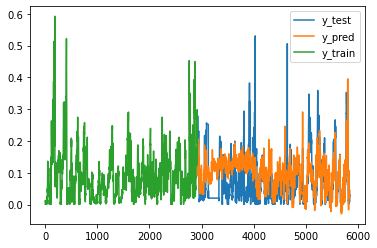

In [194]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1), y_pred_MLR1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

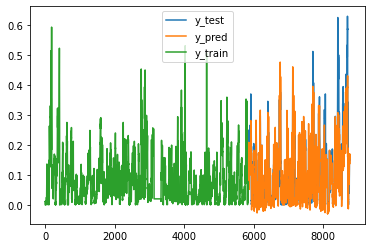

In [195]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2),ytest2)
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2), y_pred_MLR2)
plt.plot(ytrain2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

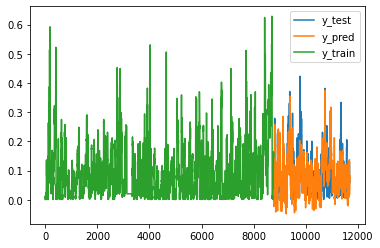

In [196]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3),ytest3)
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3), y_pred_MLR3)
plt.plot(ytrain3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])


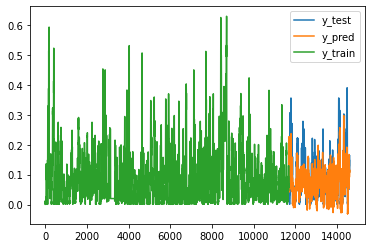

In [197]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4),ytest4)
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4), y_pred_MLR4)
plt.plot(ytrain4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])


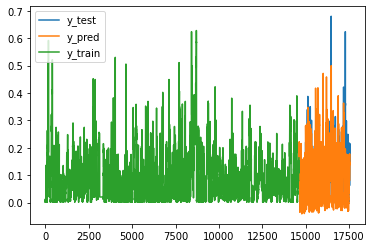

In [198]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5), y_pred_MLR5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])


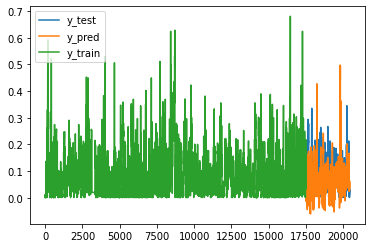

In [199]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6),ytest6)
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6), y_pred_MLR6)
plt.plot(ytrain6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])


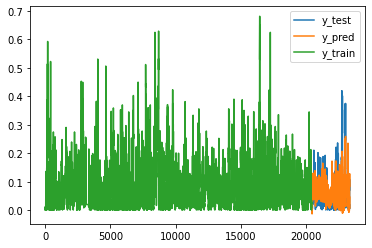

In [200]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7),ytest7)
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7), y_pred_MLR7)
plt.plot(ytrain7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

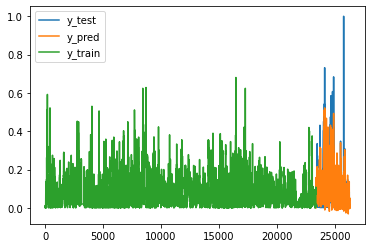

In [201]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8), y_pred_MLR8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

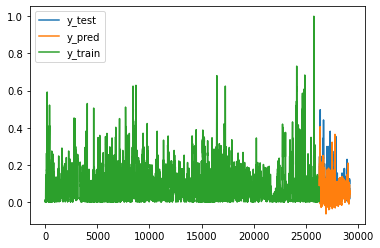

In [202]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9),ytest9)
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9), y_pred_MLR9)
plt.plot(ytrain9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

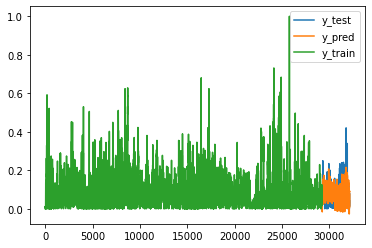

In [203]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10),ytest10)
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10), y_pred_MLR10)
plt.plot(ytrain10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

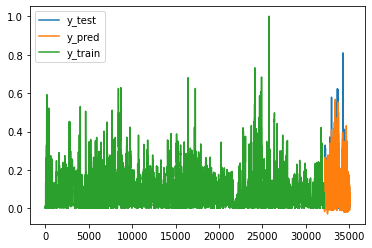

In [204]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11), y_pred_MLR11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

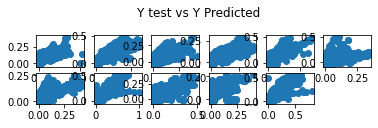

In [242]:
#Plot of test values vs predicted values
plt.subplot(6, 6, 1)
plt.scatter(ytest1, y_pred_MLR1)
 
plt.subplot(6, 6, 2)
plt.scatter(ytest2, y_pred_MLR2)
 
plt.subplot(6, 6, 3)
plt.scatter(ytest3, y_pred_MLR3)
 
plt.subplot(6, 6, 4)
plt.scatter(ytest4, y_pred_MLR4)

plt.subplot(6, 6, 5)
plt.scatter(ytest5, y_pred_MLR5)

plt.subplot(6, 6, 6)
plt.scatter(ytest6, y_pred_MLR6)

plt.subplot(6, 6, 7)
plt.scatter(ytest7, y_pred_MLR7)

plt.subplot(6, 6, 8)
plt.scatter(ytest8, y_pred_MLR8)

plt.subplot(6, 6, 9)
plt.scatter(ytest9, y_pred_MLR9)

plt.subplot(6, 6, 10)
plt.scatter(ytest10, y_pred_MLR10)

plt.subplot(6, 6, 11)
plt.scatter(ytest11, y_pred_MLR11)
 
plt.suptitle("Y test vs Y Predicted")
plt.show()

# Multiple Linear Regression 

Independent variables included: SO2, NO2, CO and O3

In [244]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3']]
y = data['PM25']

In [245]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,5:9 ], data.iloc[2922:5844, 5:9]
xtrain2, xtest2 = data.iloc[:5844,5:9 ], data.iloc[5844:8766,5:9]
xtrain3, xtest3 = data.iloc[:8766,5:9 ], data.iloc[8766:11688,5:9 ]
xtrain4, xtest4 = data.iloc[:11688,5:9 ], data.iloc[11688:14610,5:9 ]
xtrain5, xtest5 = data.iloc[:14610,5:9 ], data.iloc[14610:17532,5:9 ]
xtrain6, xtest6 = data.iloc[:17532,5:9 ], data.iloc[17532:20454,5:9 ]
xtrain7, xtest7 = data.iloc[:20454,5:9 ], data.iloc[20454:23376,5:9 ]
xtrain8, xtest8 = data.iloc[:23376,5:9 ], data.iloc[23376:26298,5:9 ]
xtrain9, xtest9 = data.iloc[:26298,5:9 ], data.iloc[26298:29220,5:9 ]
xtrain10, xtest10 = data.iloc[:29220,5:9 ], data.iloc[29220:32142,5:9 ]
xtrain11, xtest11 = data.iloc[:32142,5:9 ], data.iloc[32142:35063,5:9 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,3 ], data.iloc[2922:5844,3 ]
ytrain2, ytest2 = data.iloc[:5844, 3], data.iloc[5844:8766, 3]
ytrain3, ytest3 = data.iloc[:8766,3 ], data.iloc[8766:11688, 3]
ytrain4, ytest4 = data.iloc[:11688,3 ], data.iloc[11688:14610,3 ]
ytrain5, ytest5 = data.iloc[:14610,3 ], data.iloc[14610:17532, 3]
ytrain6, ytest6 = data.iloc[:17532,3 ], data.iloc[17532:20454,3 ]
ytrain7, ytest7 = data.iloc[:20454,3 ], data.iloc[20454:23376,3 ]
ytrain8, ytest8 = data.iloc[:23376,3 ], data.iloc[23376:26298,3 ]
ytrain9, ytest9 = data.iloc[:26298, 3], data.iloc[26298:29220,3 ]
ytrain10, ytest10 = data.iloc[:29220,3 ], data.iloc[29220:32142,3 ]
ytrain11, ytest11 = data.iloc[:32142,3 ], data.iloc[32142:35063, 3]

In [246]:
#fitting multiple linear regression model
MLR1 = lm.LinearRegression()
MLR1.fit(xtrain1,ytrain1)
#Prediction of test set
y_pred1= MLR1.predict(xtest1)
#evaluation metrics
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred1)
rsquared1 = MLR1.score(x,y)*100 

In [247]:
#trial 2
MLR2 = lm.LinearRegression()
MLR2.fit(xtrain2,ytrain2)
#Prediction of test set
y_pred2= MLR2.predict(xtest2)
#evaluation metrics
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred2)
rsquared2 = MLR2.score(x,y)*100 

In [248]:
#trial 3
MLR3 = lm.LinearRegression()
MLR3.fit(xtrain3,ytrain3)
#Prediction of test set
y_pred3 = MLR3.predict(xtest3)
#evaluation metrics
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred3)
rsquared3 = MLR3.score(x,y)*100 

In [249]:
#trial 4
MLR4 = lm.LinearRegression()
MLR4.fit(xtrain4,ytrain4)
#Prediction of test set
y_pred4= MLR4.predict(xtest1)
#evaluation metrics
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred_MLR4)
rsquared4 = MLR4.score(x,y)*100 

In [250]:
#trial 5
MLR5 = lm.LinearRegression()
MLR5.fit(xtrain5,ytrain5)
#Prediction of test set
y_pred5= MLR5.predict(xtest5)
#evaluation metrics
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred5)
rsquared5 = MLR5.score(x,y)*100 

In [251]:
#trial 6
MLR6 = lm.LinearRegression()
MLR6.fit(xtrain6,ytrain6)
#Prediction of test set
y_pred6= MLR6.predict(xtest6)
#evaluation metrics
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred6)
rsquared6 = MLR6.score(x,y)*100 

In [252]:
#trial 7
MLR7 = lm.LinearRegression()
MLR7.fit(xtrain7,ytrain7)
#Prediction of test set
y_pred7= MLR7.predict(xtest7)
#evaluation metrics
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred7)
rsquared7 = MLR7.score(x,y)*100 

In [254]:
#trial 8
MLR8 = lm.LinearRegression()
MLR8.fit(xtrain8,ytrain8)
#Prediction of test set
y_pred8= MLR8.predict(xtest8)
#evaluation metrics
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred8)
rsquared8 = MLR8.score(x,y)*100

In [255]:
#trial 9
MLR9 = lm.LinearRegression()
MLR9.fit(xtrain9,ytrain9)
#Prediction of test set
y_pred9= MLR9.predict(xtest9)
#evaluation metrics
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred9)
rsquared9 = MLR9.score(x,y)*100 

In [256]:
#trial 10
MLR10 = lm.LinearRegression()
MLR10.fit(xtrain10,ytrain10)
#Prediction of test set
y_pred10= MLR10.predict(xtest10)
#evaluation metrics
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred10)
rsquared10 = MLR10.score(x,y)*100 

In [257]:
#trial 11
MLR11 = lm.LinearRegression()
MLR11.fit(xtrain11,ytrain11)
#Prediction of test set
y_pred11= MLR11.predict(xtest11)
#evaluation metrics
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred11)
rsquared11 = MLR11.score(x,y)*100 

In [258]:
#print all evaluation metrics in one data frame
trial = [1,2,3,4,5,6,7,8,9,10,11]
rsquared = [MLR1.score(x,y)*100, MLR2.score(x,y)*100, MLR3.score(x,y)*100,MLR4.score(x,y)*100,MLR5.score(x,y)*100,MLR6.score(x,y)*100,MLR7.score(x,y)*100,MLR8.score(x,y)*100,MLR9.score(x,y)*100,MLR10.score(x,y)*100,MLR11.score(x,y)*100]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': rsquared, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,60.519397,0.042641,2.178687e+00,0.003423,0.058508
1,2,62.895275,0.038947,1.401055e+00,0.003258,0.057081
2,3,63.107072,0.035361,1.116857e+00,0.002458,0.049580
3,4,63.396097,0.067116,9.061499e-01,0.007823,0.088450
4,5,62.574984,0.035823,1.371166e+00,0.002731,0.052262
5,6,63.374326,0.031580,9.737832e-01,0.003252,0.057030
6,7,64.094312,0.028792,1.150326e+00,0.002075,0.045554
7,8,63.997212,0.033301,1.210298e+00,0.003014,0.054897
8,9,63.933725,0.034987,1.495127e+00,0.002928,0.054109
9,10,63.981096,0.028033,9.716695e-01,0.001810,0.042541


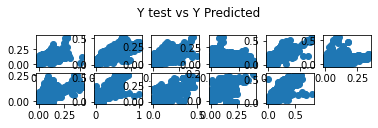

In [259]:
#Plot of test values vs predicted values
plt.subplot(6, 6, 1)
plt.scatter(ytest1, y_pred1)
 
plt.subplot(6, 6, 2)
plt.scatter(ytest2, y_pred2)
 
plt.subplot(6, 6, 3)
plt.scatter(ytest3, y_pred3)
 
plt.subplot(6, 6, 4)
plt.scatter(ytest4, y_pred4)

plt.subplot(6, 6, 5)
plt.scatter(ytest5, y_pred5)

plt.subplot(6, 6, 6)
plt.scatter(ytest6, y_pred6)

plt.subplot(6, 6, 7)
plt.scatter(ytest7, y_pred7)

plt.subplot(6, 6, 8)
plt.scatter(ytest8, y_pred8)

plt.subplot(6, 6, 9)
plt.scatter(ytest9, y_pred9)

plt.subplot(6, 6, 10)
plt.scatter(ytest10, y_pred10)

plt.subplot(6, 6, 11)
plt.scatter(ytest11, y_pred11)
 
plt.suptitle("Y test vs Y Predicted")
plt.show()